In [1]:
def params(path,nam,directed):
    name = path+nam+".csv"
    stri = ["non-strict"]
    be = ["bet", "bet_exact"]
    if directed:
        name = name+"_directed_exp/"
    else:
        name = name+"_undirected_exp/"
    #path = path + "_boost/"
    cost_type = [["shortest","passive"], ["shortest","active"], ["shortestfastest","passive"] , ["shortestfastest","active"], ["foremost","passive"] , ["shortestforemost","passive"]]
    app = [2,5,10,20,40,60,-1]
    return (name,be,stri,cost_type,app)

In [3]:
def charact(name):
    print(name+"info_-1.txt")
    f = open(name+"info_-1.txt", "r")
#     print(name,end='')
    i = 0
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        if i == 0:
            n = int(res[-1])
        if i == 1:
            T = int(res[-1])
        i = i + 1
    return (n,T)

In [4]:
def res_dic(path, be,stri,cost_type,app,T):
    res = dict()
    res_bet = dict()
    res_sum_node = dict()
    res_sum_time = dict()

    for b in be:
        for st in stri:
            for co in cost_type:
                for ap in app:
                    #print(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt")
                    f = open(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt", "r")
                    if ap not in res:
                        res[ap] = dict()
                    if ap not in res_bet:
                        res_bet[ap] = dict()
                    if ap not in res_sum_node:
                        res_sum_node[ap] = dict()
                    if ap not in res_sum_time:
                        res_sum_time[ap] = dict()

                    if st not in res[ap]:
                        res[ap][st] = dict()
                    if st not in res_bet[ap]:
                        res_bet[ap][st] = dict()
                    if st not in res_sum_node[ap]:
                        res_sum_node[ap][st] = dict()
                    if st not in res_sum_time[ap]:
                        res_sum_time[ap][st] = dict()

                    if b not in res_bet[ap][st]:
                        res_bet[ap][st][b] = dict()
                    res_bet[ap][st][b][co[0]+"_"+co[1]] = []

                    if b not in res[ap][st]:
                        res[ap][st][b] = dict()

                    if b not in res_sum_node[ap][st]:
                        res_sum_node[ap][st][b] = dict()
                    if b not in res_sum_time[ap][st]:
                        res_sum_time[ap][st][b] = dict()

                    if co[1] not in res[ap][st][b]:
                        res[ap][st][b][co[1]] = dict()
                    if co[1] not in res_sum_node[ap][st][b]:
                        res_sum_node[ap][st][b][co[1]] = dict()
                    if co[1] not in res_sum_time[ap][st][b]:
                        res_sum_time[ap][st][b][co[1]] = dict()

                    res[ap][st][b][co[1]][co[0]] = []

                    res_sum_time[ap][st][b][co[1]][co[0]] = [0 for i in range(T)]
                    res_sum_node[ap][st][b][co[1]][co[0]] = [0 for i in range(n)]



                    i = 0
                    for x in f:
                        res_sum_node[ap][st][b][co[1]][co[0]][i//T] +=  float(x)
                        res_sum_time[ap][st][b][co[1]][co[0]][i%T] += float(x)
                        res[ap][st][b][co[1]][co[0]].append(float(x))
                        res_bet[ap][st][b][co[0]+"_"+co[1]].append(float(x))
                        i += 1
    return (res,res_bet,res_sum_node,res_sum_time)

In [5]:
#min max
import scipy.stats as stats
import matplotlib.pyplot as plt
def min_max_cruve(name,points,col,res,d,n):
    s = "non-strict"
    mini = -1
    maxi = -1
    color = col
    for co in cost_type:
        res_ap = []
        ty = co[1]
        c = co[0]
        i = points[-2]
        tab = [ stats.kendalltau(res[-1][s]["bet_exact"][ty][c], res[points[j]][s]["bet_exact"][ty][c])[0] for j in range(0,len(points)) ]
        meas = stats.kendalltau(res[-1][s]["bet_exact"][ty][c], res[i][s]["bet_exact"][ty][c])[0]
        if mini == -1:
            mini = meas
            val_min = (ty,c)
            tab_min = tab[:]
        if maxi == -1:
            maxi = meas
            val_max = (ty,c)
            tab_max = tab[:]
        if meas < mini:
            mini = meas
            val_min = (ty,c)
            tab_min = tab[:]
        if meas > maxi:
            val_max = (ty,c)
            maxi = meas
            tab_max = tab[:]
    d[name] = dict()
    d[name][(0.5,val_min,color)] = tab_min,[ points[i]/n for i in range(0,len(points)-1) ]+[1]
    d[name][(1,val_max,color)] = tab_max,[ points[i]/n for i in range(0,len(points)-1) ]+[1]

In [6]:
path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/"
d = dict()
names = [["highschool_2011",True,"brown"], ["highschool_2011",False,"orange"], ["hospital_ward",False,"blue"],["hospital_ward",True,"red"]]
for nam,dire,col in names:
    path_add,be,stri,cost_type,app = params(path,nam,dire)
#     print(path_add)
    n, T = charact(path_add)
    res,res_bet,res_sum_node,res_sum_time = res_dic(path_add,be,stri,cost_type,app,T)
    name_curve = nam
    if dire:
        name_curve += "_d"
    min_max_cruve(name_curve,app,col,res_sum_node,d,n)
    res,res_bet,res_sum_node,res_sum_time = dict(),dict(),dict(),dict()


/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/highschool_2011.csv_directed_exp/info_-1.txt
/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/highschool_2011.csv_undirected_exp/info_-1.txt
/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/hospital_ward.csv_undirected_exp/info_-1.txt
/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/hospital_ward.csv_directed_exp/info_-1.txt


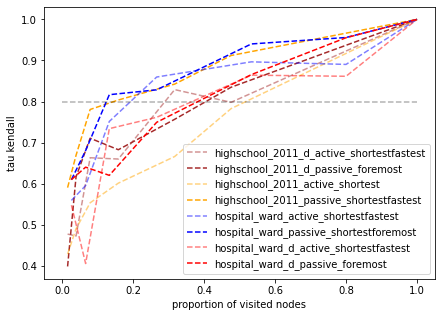

In [8]:
#for all 0.75 for nodes 0.8
plt.figure(figsize=(7,5))
points_prop = [2,5,10,20,40,60,-1]
for nam in d.keys():
    for elem in d[nam].keys():
        x,co,z = elem
        
        plt.plot(d[nam][elem][1],d[nam][elem][0],'--', label=nam+"_"+co[0]+"_"+co[1], color=z,alpha = x)
plt.ylabel('tau kendall')
plt.xlabel('proportion of visited nodes')
plt.plot([0,1],[0.8,0.8], "--", color="black",alpha=0.3)
leg = plt.legend(loc='best')
# leg.get_frame().set_alpha(0.5)
plt.savefig("out.png")
plt.show()

passive shortest
active shortest
passive shortestfastest
active shortestfastest
passive foremost
passive shortestforemost


/tmp/ipykernel_172981/3489386121.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))


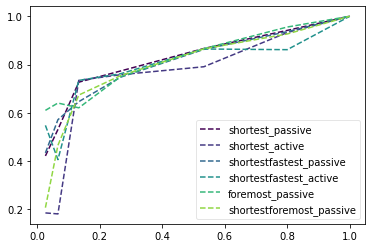

In [14]:
#approx agg node
import scipy.stats as stats
import matplotlib.pyplot as plt


#c = "shortest"
s = "non-strict"
i = 0
nb = len(cost_type)
points = [2,5,10,20,40,60,-1]
points_prop = [2/n,5/n,10/n,20/n,40/n,60/n,n/n]

for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    print(ty,c)
    for a in points:
        res_ap.append(stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[a][s]["bet_exact"][ty][c])[0] )
    plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))
    i = i +1
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()

passive shortest
active shortest
passive shortestfastest
active shortestfastest
passive foremost
passive shortestforemost


/tmp/ipykernel_172981/3441255776.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))


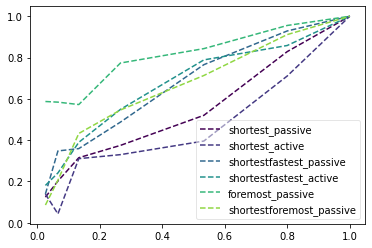

In [15]:
#approx agg time
import scipy.stats as stats
import matplotlib.pyplot as plt

i = 0
nb = len(cost_type)
for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    print(ty,c)
    for a in points:
        res_ap.append(stats.kendalltau(res_sum_time[-1][s]["bet_exact"][ty][c], res_sum_time[a][s]["bet_exact"][ty][c])[0] )
    plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))
    i = i +1
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()

passive shortest


/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/tmp/ipykernel_172981/4216570734.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))


active shortest
passive shortestfastest


/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:4869: RuntimeWarning: invalid value encountered in sqrt
  z = con_minus_dis / np.sqrt(var)


active shortestfastest
passive foremost
passive shortestforemost


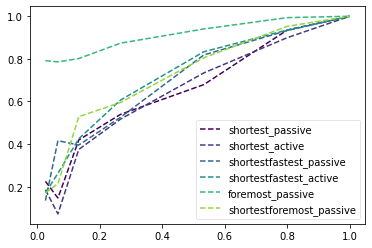

In [16]:
#approx all
import scipy.stats as stats
import matplotlib.pyplot as plt

i = 0
nb = len(cost_type)
for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    print(ty,c)
    for a in points:
        res_ap.append(stats.kendalltau(res[-1][s]["bet_exact"][ty][c], res[a][s]["bet_exact"][ty][c])[0] )
    plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))
    i = i +1
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()